In [264]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [265]:
%cd ..

/proj


In [266]:
import torch
from som import som_learner, UnsupervisedDataset, SomInterpretation, SomStatsVisualizer

In [267]:
from torch import Tensor
from sklearn.datasets import load_iris
from typing import Tuple
from itertools import combinations_with_replacement

def iris():
    "Loads the IRIS dataset into two tensors."
    iris = load_iris()
    x = torch.tensor(iris.data)
    y = torch.tensor(iris.target)
    labels = iris.feature_names
    map_size = (4,4)
    alpha = 0.3
    bs = 10
    epochs = 30
    return x, y, labels, map_size, alpha, bs, epochs
    
def colors(n: int = 11000):
    "Loads a dataset containing all possible RGB color combinations"
    x = torch.FloatTensor(n, 3).uniform_(0, 255).long().float()
    y = None
    labels = ['Red', 'Green', 'Blue']
    map_size = (10, 10)
    alpha = 0.03
    bs = 25
    epochs = 80
    return x, y, labels, map_size, alpha, bs, epochs

def uniform(n: int = 11000, s: int = 3):
    "Loads a uniform dataset"
    x = torch.randn(n, s)
    y = None
    labels = list(range(s))
    map_size = (6, 6)
    alpha = 0.03
    bs = 50
    epochs = 150
    return x, y, labels, map_size, alpha, bs, epochs
    

In [268]:
x, y, labels, map_size, alpha, bs, epochs = colors()


In [269]:
x.shape

torch.Size([11000, 3])

In [270]:
size = (map_size[0], map_size[1], x.shape[-1])
size

(10, 10, 3)

In [271]:
def pct_split(x: Tensor, pct: float = 0.1):
    sep = int(x.shape[0] * (1 - pct))
    return x[:sep], x[sep:]

In [272]:
x_train, x_valid = pct_split(x)

In [273]:
x_train[0]

tensor([238., 243., 125.])

In [274]:
ud = UnsupervisedDataset.create(train=x_train, valid=x_valid, bs=bs, norm=True)

In [275]:
ud.train[0]

tensor([0.9370, 0.9567, 0.4921], device='cuda:0')

In [276]:
alpha, bs, epochs

(0.03, 25, 80)

[running kmeans]: 9it [00:00, 47.79it/s, center_shift=0.220031, iteration=10, tol=0.000100]

running k-means on cuda..


[running kmeans]: 38it [00:00, 52.76it/s, center_shift=0.000032, iteration=38, tol=0.000100]


<IPython.core.display.Javascript object>


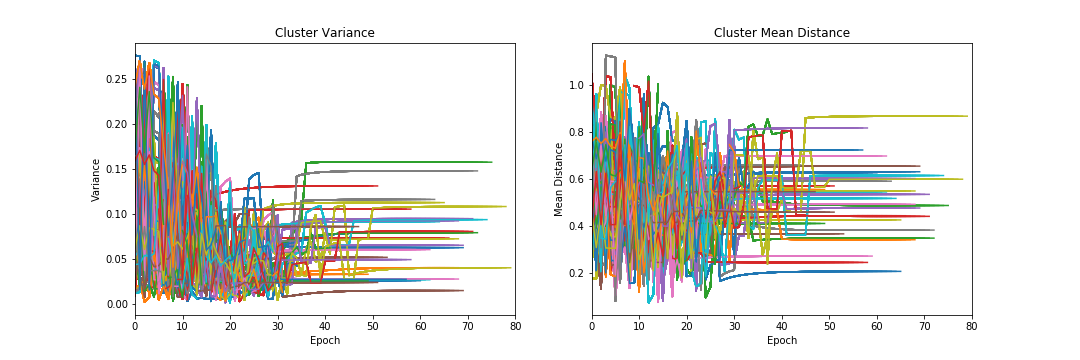

<IPython.core.display.Javascript object>


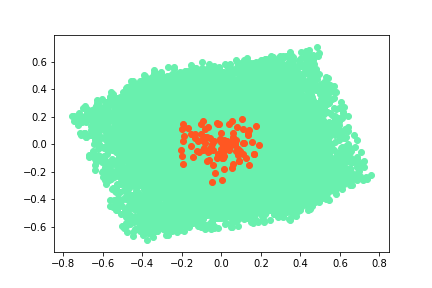

In [277]:
%matplotlib notebook
learn = som_learner(ud, map_size=map_size, init='kmeans_euclidean', alpha=alpha)
learn.fit(epochs, visualize_dim=2, visualize=True, debug=False)

In [278]:
interp = SomInterpretation.from_learner(learn)

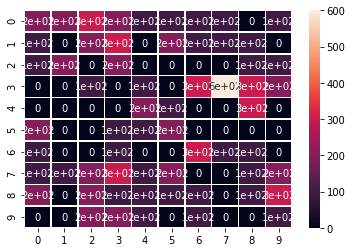

In [279]:
%matplotlib inline
interp.show_hitmap()

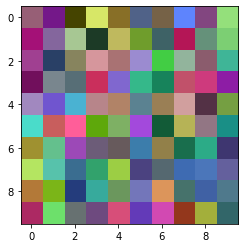

In [280]:
interp.show_omni_heatmap()

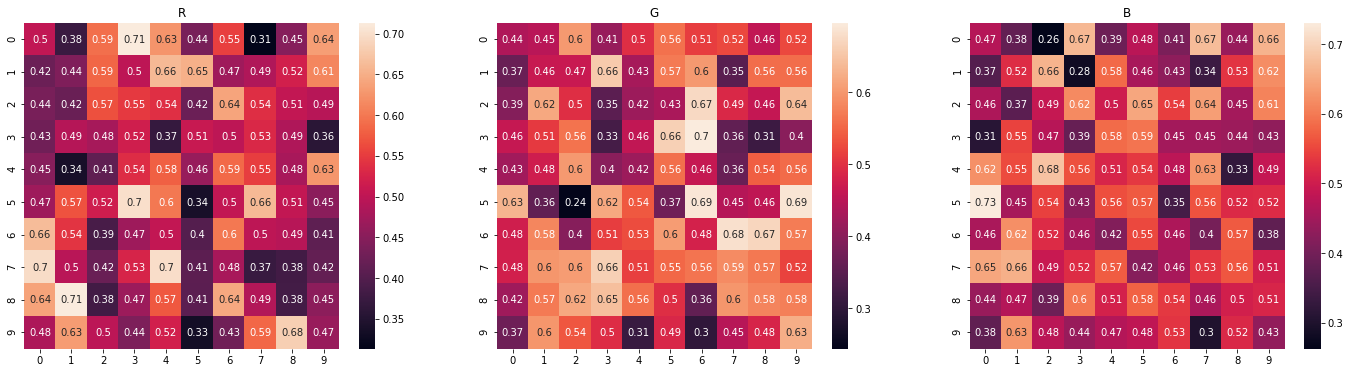

In [300]:
interp.show_feature_heatmaps(labels=labels)

In [ ]:
def pwd(x, y):
    n = x.size(0)
    m = y.size(0)
    d = x.size(1)

    x = x.unsqueeze(1).expand(n, m, d)
    y = y.unsqueeze(0).expand(n, m, d)
    
#     if self.training:
#         self._diffs = x - y
#         return self._diffs.pow(2).sum(2).sqrt()
    
    return torch.pow(x - y, 2).sum(2).sqrt()

## TODO

- Get the BMU of each node
- Associate the BMU to its weight vector
- Calculate difference of each input value and its BMU weight
- Calculate variance of each cluster